In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

import numpy as np
from kmodes.kprototypes import KPrototypes

In [3]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)

In [4]:
cluster_2016.head()

,Unnamed: 0,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [5]:
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])

In [6]:
cluster_2016.tail(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
1999995,163843,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Fritzlarerstraße / Kirchplatz,214447.0,Frankfurt am Main,Android,13.083333,6
1999996,143763,Axel-Springer-Platz/Wexstraße,163327.0,Axel-Springer-Platz/Wexstraße,163327.0,Hamburg,others,1.733333,6
1999997,106407,Darmstadt Hbf,42198.0,h_da / Campus - Mensa,41940.0,Berlin,others,246.366667,6
1999998,113595,Darmstadt Hbf,128496.0,h_da / Campus - Mensa,243552.0,Darmstadt,Android,11.016667,6
1999999,143840,Dehnhaide/Barmbeker Markt,17335.0,Weidestraße /Johannes-Prassek-Park,54063.0,Berlin,iPhone,22.816667,6


In [7]:
cluster_2016['VEHICLE_HAL_ID'].unique()

array([108647, 108371, 119829, ..., 110310, 107219, 108927])

In [8]:
len(cluster_2016['VEHICLE_HAL_ID'].unique())

10001

In [9]:
cluster_2016['TECHNICAL_INCOME_CHANNEL'].unique()

array(['Android', 'iPhone', 'others', 'IVR', 'Windows', 'BlackBerry'],
      dtype=object)

In [10]:
cluster_2016['Month'].unique()

array([1, 2, 3, 4, 5, 6])

In [32]:
#! pip install kmodes
# ! pip install --upgrade pip

# Implementation

In [11]:
# converting all categorcal variable to dummy encoding

cluster_2016['CITY_RENTAL_ZONE']=cluster_2016['CITY_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['TECHNICAL_INCOME_CHANNEL']=cluster_2016['TECHNICAL_INCOME_CHANNEL'].astype('category').cat.codes
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])

In [12]:
cluster_2016.tail(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
1999995,163843,226257.0,214447.0,12,0,13.083333,6
1999996,143763,163327.0,163327.0,18,5,1.733333,6
1999997,106407,42198.0,41940.0,3,5,246.366667,6
1999998,113595,128496.0,243552.0,8,0,11.016667,6
1999999,143840,17335.0,54063.0,3,4,22.816667,6


In [13]:
# To convert the value into numpy array

cluster_2016 = cluster_2016.iloc[:, 0:].values

In [15]:
# printing the first array of features

cluster_2016[0]

array([1.08647e+05, 2.13687e+05, 2.13855e+05, 1.80000e+01, 0.00000e+00,
       2.88000e+01, 1.00000e+00])

In [ ]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kproto = KPrototypes(n_clusters=7, init='Cao', verbose=2)

# fit the data in numpy array format , and given all the  categorical features index
clusters = kproto.fit(cluster_2016, categorical=[0, 1, 2, 3, 4, 6])

# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.n_iter_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

In [ ]:
# save the model to disk
import pickle

In [ ]:
# creating a file that can save the model
filename = 'kproto1.sav'

In [ ]:
# save the model in the file
pickle.dump(kproto, open(filename, 'wb'))

In [ ]:
# load the model from disk for faster implementation
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model.cost_)

In [ ]:
# for predict a new data points with index of categorical value

loaded_model.predict(np.array([[1.43840000e+05, 1.73350000e+04, 5.40630000e+04, 3.00000000e+00,
       4.00000000e+00, 2.28166667e+01, 6.00000000e+00]]),categorical=[0, 1, 2, 3, 4,6])

In [ ]:
print(kproto.cost_)

In [ ]:
print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

In [ ]:
# To predict on new data points

kproto.predict(np.array([[1.43840000e+05, 1.73350000e+04, 5.40630000e+04, 3.00000000e+00,
       4.00000000e+00, 2.28166667e+01, 6.00000000e+00]]),categorical=[0, 1, 2, 3, 4,6])

In [ ]:
# Predicted cluster level on existing dataset
final = kproto.labels_
np.unique(final)

In [ ]:
# total data
kproto.labels_.shape

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_2016)

In [50]:
%matplotlib inline

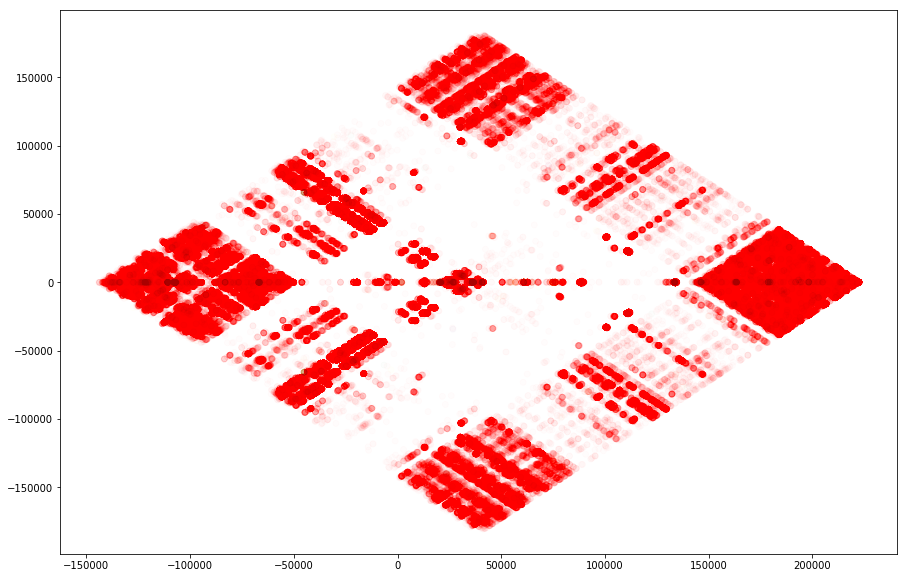

In [51]:
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in kproto.labels_] ,label = kproto.labels_, alpha=0.01)
plt.show()

In [52]:
plt.savefig('kproto2.png')

<Figure size 432x288 with 0 Axes>

In [53]:
labels = [colors[l_] for l_ in kproto.labels_]

In [54]:
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    1991924
dtype: int64
blue 0    186
dtype: int64
yellow 0    6319
dtype: int64
green 0    1522
dtype: int64
purple 0    38
dtype: int64
cyan 0    3
dtype: int64
brown 0    8
dtype: int64


* As must of the dataset goes in cluster-1 which is quite big in size
* So again we divide the cluster-1 into 7 small clusters.
* This is called Hierarchical clustering

In [55]:
# As we already used categorical features and they are already encoded. So we use kmeans algorithm for clustering.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)  
pr_out = kmeans.fit(plot_columns)
#plot_columns

In [56]:
pr_out = kmeans.transform(plot_columns)

In [57]:
colors = ['red','green','purple','blue','cyan','black','pink','brown','yellow']

In [58]:
kmeans.labels_

array([4, 3, 3, ..., 1, 2, 1], dtype=int32)

In [59]:
len(plot_columns)

2000000

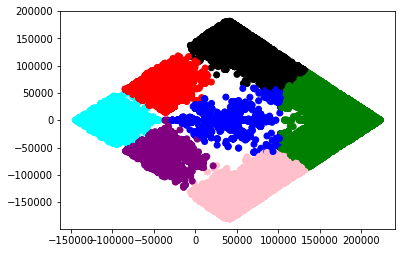

In [60]:
# plotting the sub-clusters 

plt.scatter(plot_columns[:,0],plot_columns[:,1],c=[colors[l] for l in kmeans.labels_])
#plt.show()

In [61]:
plt.savefig('hierarchial_clustering.png')

<Figure size 432x288 with 0 Axes>

* Here we see that the dataset are easily separable by the cluster labels.